
1) Gerekli Kütüphanelerin Eklenmesi

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold

2) Veri Toplamak

"Veri Seti: https://www.kaggle.com/datasets/mirichoi0218/insurance"

In [79]:
df = pd.read_csv("insurance.csv")

3) Veri İncelemek ve Görselleştirmek

#Veri setinin ilk 5i


In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
df.shape

(1338, 7)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


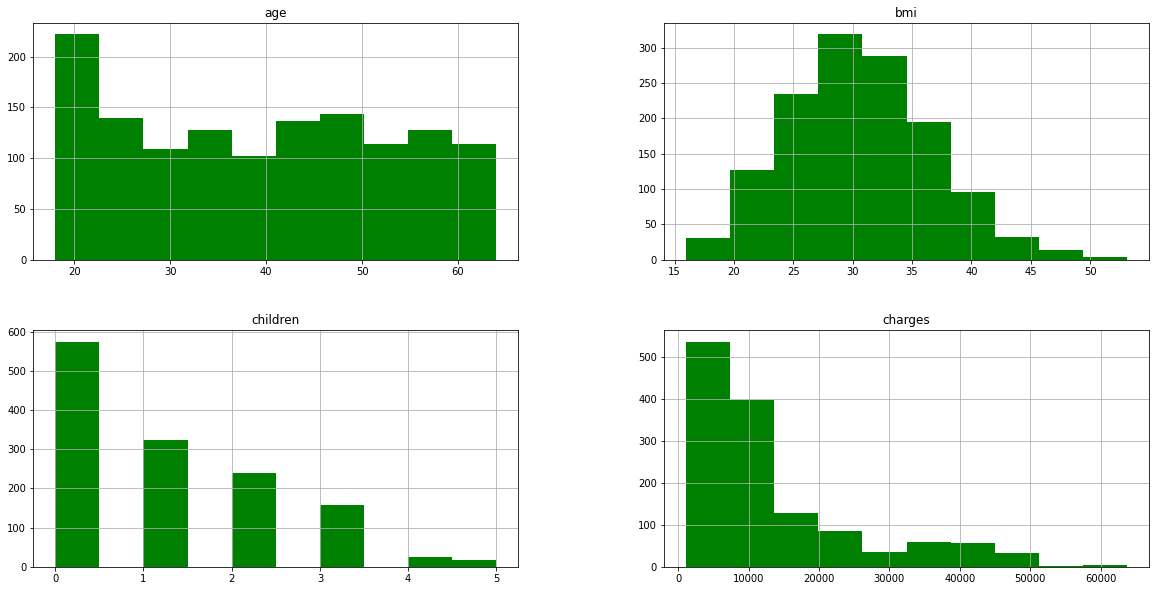

In [84]:
df.hist(figsize =(20,10), color = "green")
plt.show()

In [85]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


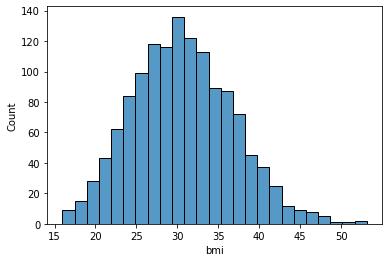

In [86]:
sns.histplot(df.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


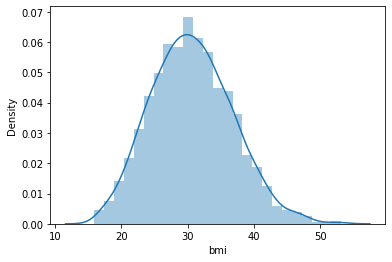

In [87]:
sns.distplot(df.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


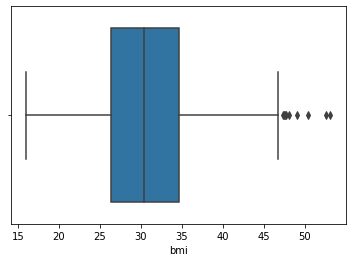

In [88]:
sns.boxplot(df.bmi)

In [89]:
df.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

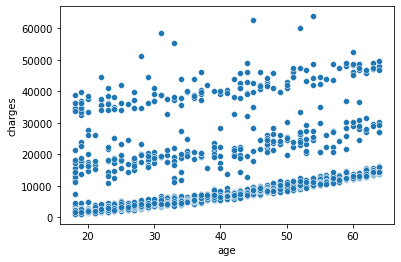

In [90]:
sns.scatterplot(x="age",y="charges",data=df)

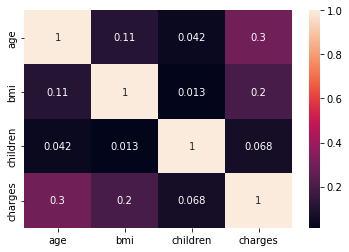

In [91]:
corr=df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True)

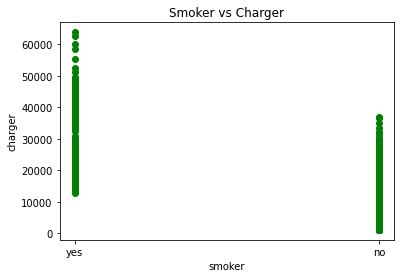

In [92]:
plt.scatter(x=df["smoker"],y=df["charges"],color="green")
plt.xlabel("smoker")
plt.ylabel("charger")
plt.title("Smoker vs Charger")
plt.show()

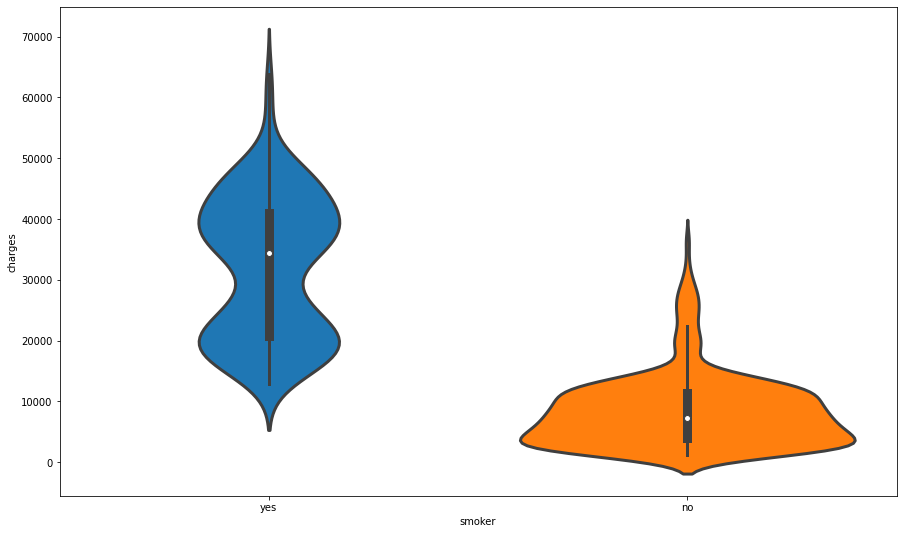

In [93]:
plt.figure(figsize=(15,9))
sns.violinplot(x="smoker" , y="charges" , data=df,linewidth=3,saturation=1.5)
plt.show()
#Sigara içenlerin, sağlık sigortası masrafları içmeyenlere göre daha fazla.

In [94]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

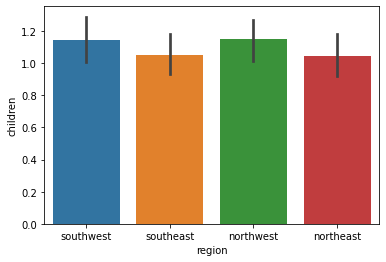

In [95]:
sns.barplot(x="region",y="children",data=df)


In [96]:
children_count = df.groupby("region")["children"].sum()
children_count

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

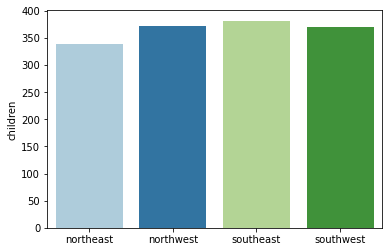

In [97]:
sns.barplot(x = children_count.index.tolist(), y = children_count, palette="Paired")

In [98]:
df.groupby(["smoker","region"]).size().reset_index(name="count")
#Sigara kullanmayanların en çok olduğu bölge>>Southeast
#Sigara kullananların en çok olduğu bölge>>Southeast


,smoker,region,count
0,no,northeast,257
1,no,northwest,267
2,no,southeast,273
3,no,southwest,267
4,yes,northeast,67
5,yes,northwest,58
6,yes,southeast,91
7,yes,southwest,58


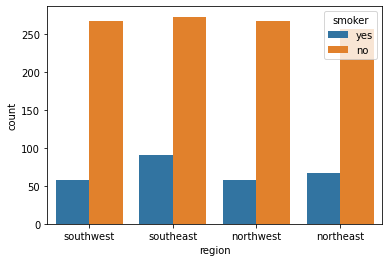

In [99]:
sns.countplot(x="region",data=df,hue="smoker")

In [100]:
df.groupby(["sex"])["bmi"].describe()
#Kadın ve erkeklerin vücut kitle indekslerinin ortalaması,birbirlerine yakın.

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


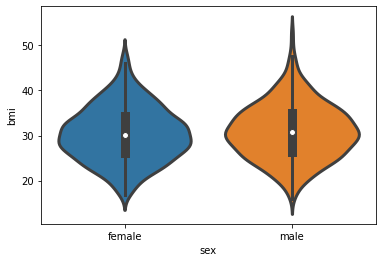

In [101]:
sns.violinplot(x="sex",y="bmi",data=df,linewidth=3)

In [102]:
cm=df.groupby(["region"])["children"].sum().reset_index(name="count")
cm

,region,count
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


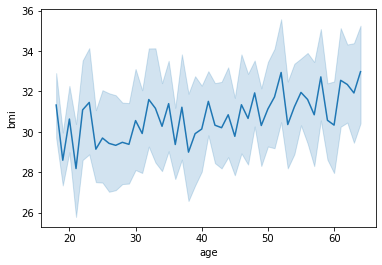

In [103]:
sns.lineplot(x="age",y="bmi",data=df)
#20'li yaşlarda bmi en düşük değerlerini alırken 50'li yaşlarda en yüksek değerlerini almış

In [104]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [105]:
df.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


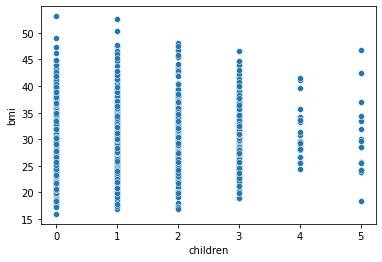

In [106]:
sns.scatterplot(x="children",y="bmi",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


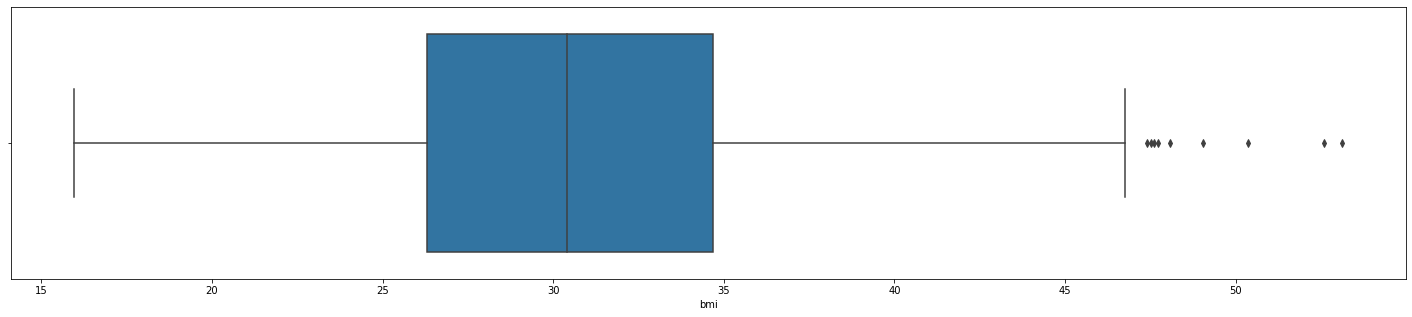

In [107]:
plt.figure(figsize=(25,5))
sns.boxplot(df["bmi"],data=df);
plt.show()
#bmide aykırı değerler bulunmakta.

In [108]:
df_bmi=df["bmi"]
Q1=df_bmi.quantile(0.25)
Q3=df_bmi.quantile(0.75)
IQR=Q3-Q1
IQR

8.3975

In [109]:
Q1
alt_sinir=Q1-1.5*IQR
alt_sinir

13.7

In [110]:
Q3
ust_sinir=Q3+1.5*IQR
ust_sinir

47.290000000000006

In [111]:
alt=(df_bmi < alt_sinir)
df_bmi[alt]
#öznitelikte alt sınırın altında bir aykırı değer bulunmamakta.

Series([], Name: bmi, dtype: float64)

In [112]:
ust=(df_bmi> ust_sinir)
df_bmi[ust]
#üst sınırda 9 adet aykır değer bulunmakta.

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [113]:
df_bmi.mean()
#Ortalama, bazı değerlerden çok düşük olduğu için aykırı değerleri üst sınır 
#değeriyle doldurduk.Çünkü değerler üst sınıra yakın.

30.66339686098655

In [114]:
df_bmi[ust]=ust_sinir
df_bmi[ust]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


116     47.29
286     47.29
401     47.29
543     47.29
847     47.29
860     47.29
1047    47.29
1088    47.29
1317    47.29
Name: bmi, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


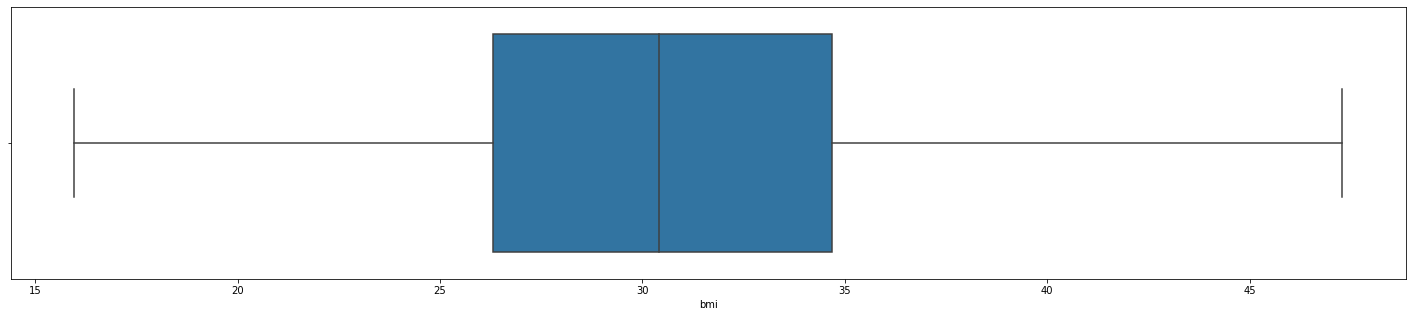

In [115]:
plt.figure(figsize=(25,5))
sns.boxplot(df["bmi"],data=df);
plt.show()
#Aykırı değer yok.

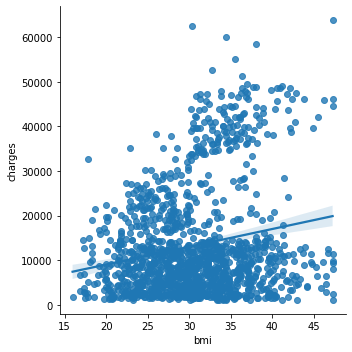

In [116]:
sns.lmplot(x = "bmi", y="charges", data=df,);
#Kitle indeksi arttıkça ödenen masraflarda artmış.Yoğunluk olarak hepsi aynı bölgede.

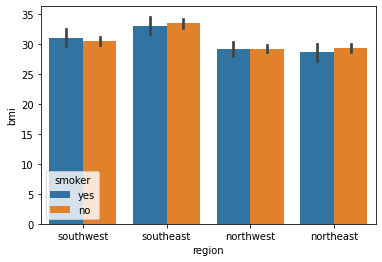

In [117]:
sns.barplot(x="region",y="bmi",hue="smoker",data=df)
#Bölgelerde sigara içip içmemek hemen hemen aynı ortalamalarda.

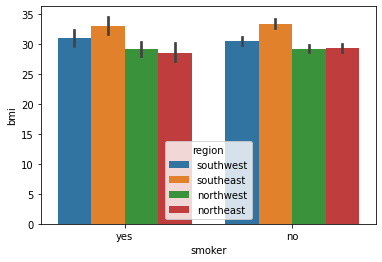

In [118]:
sns.barplot(x="smoker",y="bmi",hue="region",data=df)

In [119]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**4**.Veriyi ML Modellerine  Uygun Hale Getirmek

In [171]:
x=df["smoker"]
y=df["charges"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.8)
print(x_train.ndim, x_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(x_train),type(x_test),type(y_train),type(y_test))
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print((len(x_train)))
print((len(y_train)))
print((len(x_test)))
print((len(y_test)))

1 1 1 1

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
1070
1070
268
268


In [173]:
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
#x_test = x_test.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
#x_train.shape

In [152]:
print(x_train.shape)
print(y_train.shape)

(1070, 1)
(1070, 1)


5) Model Seçimi ve Modelin Eğitilmesi

In [153]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [154]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [155]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [156]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [157]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [158]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [159]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,train_size=0.8)
print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))


The shape of x_train is: (1070,)
The shape of x_test is: (268,)
The shape of y_train is: (1070,)
The shape of y_test is: (268,)


In [160]:
lgbm_model = LGBMRegressor()

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

4805.252451148584

In [174]:
scaler = StandardScaler()

for i in [x_train, x_test, y_train, y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

ValueError: ignored

In [175]:
linear_regression_model = LinearRegression()

knn_model = KNeighborsRegressor(n_neighbors=7)

tree_model = DecisionTreeRegressor(max_depth = 3)

random_forest_model = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada_model = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gradient_boosting_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb_model = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2, objective = "reg:squarederror")

In [176]:
regressors = [('Linear Regression', linear_regression_model), 
              ('k Nearest Neighbours', knn_model),
              ('Decision Tree', tree_model),
              ('Random Forest', random_forest_model),
              ('AdaBoost', ada_model),
              ('Gradient Boosting Regressor', gradient_boosting_model), 
              ('XGBoost', xgb_model)]

In [179]:
r2_scores = []

for regressor_name, model in regressors:
    
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=5, scoring="r2")
    r2_scores.append(scores.mean()*100)

    print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/5*100,3))+"%\n")

AttributeError: ignored

Hyperparameter Optimizasyonu

In [178]:

xgb = XGBRegressor()
parameters = {
              'eta': [.03, .07, 0.1], 
              "min_child_weight": [.1, .5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )
xgb_grid.fit(x_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 360, in fit
    trainDmatrix = DMatrix(X, label=y, missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 404, in __init__
    self._init_from_npy2d(data, missing, nthread)
  File "/us

ValueError: ignored

Modeli Değerlendirme

In [168]:
# RMSE, RMAE and r2_score Hesaplama
    
rmse = cross_val_score( XGBRegressor(learning_rate=0.03, max_depth = 4, min_child_weight = 0.1), x_train, y_train ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (rmse, 3))


Mean Squared Error of XGBoost: (array([nan, nan, nan, nan, nan]), 3)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 360, in fit
    trainDmatrix = DMatrix(X, label=y, missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 404, in __init__
    self._init_from_npy2d(data, missing, nthread)
  File "/usr/loca

In [169]:
rmae = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), x_train, y_train ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (rmae, 3))



Mean Absolute Error of XGBoost: (array([nan, nan, nan, nan, nan]), 3)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 360, in fit
    trainDmatrix = DMatrix(X, label=y, missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 404, in __init__
    self._init_from_npy2d(data, missing, nthread)
  File "/usr/loca

In [170]:
r2 = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), x_train, y_train ,cv=5, scoring = "r2").mean() # Generally used to determine how good is the model. 
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")

r2 Score of XGBoost: nan%



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 360, in fit
    trainDmatrix = DMatrix(X, label=y, missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 404, in __init__
    self._init_from_npy2d(data, missing, nthread)
  File "/usr/loca